In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import copy

import warnings
warnings.filterwarnings('ignore') # 実行上問題ない注意は非表示にする

%matplotlib inline

In [19]:
data_dir = "./"
data = pd.read_csv(data_dir + "USDJPY_d2.csv")# FXデータの読み込み（データは同じリポジトリのdataフォルダに入っています）
data.loc['6300'] = ['2019-04-08','111.721','111.760','111.284','111.489']
data.loc['6301'] = ['2019-04-09','111.489','111.580','110.980','111.147']
data.loc['6302'] = ['2019-04-10','111.147','111.282','110.845','111.012']
data.loc['6303'] = ['2019-04-11','111.012','110.69','110.908','111.012']
data.loc['6304'] = ['2019-04-12','111.665','112.094','111.586','112.020']
data.loc['6305'] = ['2019-04-15','112.020','112.096','111.890','112.038']
data.loc['6306'] = ['2019-04-16','112.038','112.048','111.847','112.014']
data.tail() # データの概要を見てみます

,Date,Open,High,Low,Close
6302,2019-04-10,111.147,111.282,110.845,111.012
6303,2019-04-11,111.012,110.69,110.908,111.012
6304,2019-04-12,111.665,112.094,111.586,112.020
6305,2019-04-15,112.020,112.096,111.890,112.038
6306,2019-04-16,112.038,112.048,111.847,112.014


In [20]:
data2 = np.array(data)

In [21]:
# 5日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 5
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float) # pythonは0番目からindexが始まります
    data2[i,5] = np.mean(tmp)

In [22]:
# 25日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))]
ave_day = 25
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,6] = np.mean(tmp)

# 75日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 75
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,7] = np.mean(tmp)
    
# 200日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 200
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,8] = np.mean(tmp)


In [23]:
# 一目均衡表を追加します (9,26,52) 
para1 =9
para2 = 26
para3 = 52

# 転換線 = （過去(para1)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
for i in range(para1, len(data2)):
    tmp_high =data2[i-para1+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para1+1:i+1,3].astype(np.float)
    data2[i,9] = (np.max(tmp_high) + np.min(tmp_low)) / 2 
    
# 基準線 = （過去(para2)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para2, len(data2)):
    tmp_high =data2[i-para2+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para2+1:i+1,3].astype(np.float)
    data2[i,10] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

# 先行スパン1 = ｛ （転換値+基準値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(0, len(data2)-para2):
    tmp =(data2[i,9] + data2[i,10]) / 2 
    data2[i+para2,11] = tmp


# 先行スパン2 = ｛ （過去(para3)日間の高値+安値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para3, len(data2)-para2):
    tmp_high =data2[i-para3+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para3+1:i+1,3].astype(np.float)
    data2[i+para2,12] = (np.max(tmp_high) + np.min(tmp_low)) / 2

In [24]:
# 25日ボリンジャーバンド（±1, 2シグマ）を追加します
parab = 25
data2 = np.c_[data2, np.zeros((len(data2),4))] # 列の追加
for i in range(parab, len(data2)):
    tmp = data2[i-parab+1:i+1,4].astype(np.float)
    data2[i,13] = np.mean(tmp) + 1.0* np.std(tmp) 
    data2[i,14] = np.mean(tmp) - 1.0* np.std(tmp) 
    data2[i,15] = np.mean(tmp) + 2.0* np.std(tmp) 
    data2[i,16] = np.mean(tmp) - 2.0* np.std(tmp)

In [25]:
# データの内容を見ます
data_show=pd.DataFrame(data2)
data_show

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1995-01-02,99.55,100.4,99.55,100.14,0,0,0,0,0,0,0,0,0,0,0,0
1,1995-01-03,100.21,100.68,100,100.65,0,0,0,0,0,0,0,0,0,0,0,0
2,1995-01-04,100.65,101.45,100.55,101.31,0,0,0,0,0,0,0,0,0,0,0,0
3,1995-01-05,101.31,101.35,100.75,100.9,0,0,0,0,0,0,0,0,0,0,0,0
4,1995-01-06,100.85,101.39,100.8,101.3,0,0,0,0,0,0,0,0,0,0,0,0
5,1995-01-09,101.25,101.35,99.6,99.92,100.816,0,0,0,0,0,0,0,0,0,0,0
6,1995-01-10,99.96,100.43,99.8,100.06,100.698,0,0,0,0,0,0,0,0,0,0,0
7,1995-01-11,100,100.2,99.45,99.99,100.434,0,0,0,0,0,0,0,0,0,0,0
8,1995-01-12,100.06,100.18,98.57,98.62,99.978,0,0,0,0,0,0,0,0,0,0,0
9,1995-01-13,98.7,99.07,98.25,98.55,99.428,0,0,0,99.85,0,0,0,0,0,0,0


In [26]:
# 説明変数となる行列Xを作成します
day_ago = 25 # 何日前までのデータを使用するのかを設定
num_sihyou = 1 + 4 + 4 +4 # 終値1本、MVave4本、itimoku4本、ボリンジャー4本

X = np.zeros((len(data2), day_ago*num_sihyou)) 

for s in range(0, num_sihyou): # 日にちごとに横向きに並べる
    for i in range(0, day_ago):
        X[i:len(data2),day_ago*s+i] = data2[0:len(data2)-i,s+4]

In [27]:
# 被説明変数となる Y = pre_day後の終値-当日終値 を作成します
Y = np.zeros(len(data2))

# 何日後の値段の差を予測するのか決めます
pre_day = 1
for i in range(len(Y)-pre_day):
    if X[pre_day + i,0] - X[i,0] >= 0:
        Y[i] = 1
    else:
        Y[i] = -1
# Y[0:len(Y)-pre_day] = X[pre_day:len(X),0] - X[0:len(X)-pre_day,0]

In [28]:
# 【重要】X, Yを正規化します
original_X = np.copy(X) # コピーするときは、そのままイコールではダメ
tmp_mean = np.zeros(len(X))

for i in range(day_ago,len(X)):
    tmp_mean[i] = np.mean(original_X[i-day_ago+1:i+1,0]) # 25日分の平均値
    for j in range(0, X.shape[1]): 
        X[i,j] = (X[i,j] - tmp_mean[i]) # Xを正規化
    Y[i] =  Y[i] # X同士の引き算しているので、Yはそのまま

In [29]:
# XとYを学習データとテストデータ(2017年～)に分ける
X_train = X[200:6100,:] # 200日平均を使うので、それ以降を学習データに使用します
Y_train = Y[200:6100] 

X_test = X[6100:len(X),:]
Y_test = Y[6100:len(Y)]

In [30]:
def result():
    test_data = original_X[6100:len(X),0]
    test_data_result = np.c_[test_data, np.zeros((len(test_data),4))]

    for i in range(len(test_data)):
        test_data_result[i, 1] = Y_pred[i]

    for i in range(len(test_data)-1):
        if Y_pred[i] >= 0:
            test_data_result[i, 2] = test_data_result[i+1 , 0] - test_data_result[i, 0]
        else:
            test_data_result[i, 2] = test_data_result[i, 0] - test_data_result[i + 1, 0]
        
    for i in range(len(Y_pred)):
        test_data_result[i, 3] = sum(test_data_result[0:i+1, 2])
    
    test_data_result[0, 4] = test_data_result[0,0]*(1 + test_data_result[0,2]/test_data_result[0,0]) 
    for i in range(1, len(Y_pred)):
        test_data_result[i, 4] = (test_data_result[i-1, 4]/test_data_result[i, 0])*(test_data_result[i, 0] + test_data_result[i, 2])


    print("Benefit is {:.3f} yen".format(test_data_result[-1, 3])) 
    print("Benefit2 is {:.3f} yen".format(test_data_result[-1, 4]-test_data_result[0, 4]))
    data_show=pd.DataFrame(test_data_result)
    plt.plot(test_data_result[:, 3])
    return data_show#.tail()

In [31]:
def result_proba(model):
    test_data = original_X[6100:len(X),0]
    test_data_result = np.c_[test_data, np.zeros((len(test_data),4))]

    for i in range(len(test_data)):
        test_data_result[i, 1] = Y_pred[i]

    for i in range(len(test_data)-1):
        if model.predict_proba(X_test)[i][0] >= 0.6:
            test_data_result[i, 2] = test_data_result[i+1 , 0] - test_data_result[i, 0]
        elif model.predict_proba(X_test)[i][0] <= 0.4:
            test_data_result[i, 2] = test_data_result[i, 0] - test_data_result[i + 1, 0]
        else:
            continue
        
    for i in range(len(Y_pred)):
        test_data_result[i, 3] = sum(test_data_result[0:i+1, 2])
        
    test_data_result[0, 4] = test_data_result[0,0]*(1 + test_data_result[0,2]/test_data_result[0,0])
    for i in range(1, len(Y_pred)):
        test_data_result[i, 4] = (test_data_result[i-1, 4]/test_data_result[i, 0])*(test_data_result[i, 0] + test_data_result[i, 2])


    print("Benefit is {:.3f} yen".format(test_data_result[-1, 3])) 
    print("Benefit2 is {:.3f} yen".format(test_data_result[-1, 4]-test_data_result[0, 4]))
    data_show=pd.DataFrame(test_data_result)
    plt.plot(test_data_result[:, 3])
    return data_show#.tail()

In [32]:
# 学習データを使用して、線形回帰モデルを作成します
from sklearn import linear_model # scikit-learnライブラリの関数を使用します
linear_reg_model = linear_model.LinearRegression()

linear_reg_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
Y_pred = linear_reg_model.predict(X_test) # 予測する


# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(linear_reg_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(linear_reg_model.score(X_test, Y_test)))

予測日数：207、正解日数：119、正解率：57.48792270531401
Training score: 0.041
Test score: 0.008


Benefit is 13.270 yen
Benefit2 is 13.541 yen


,0,1,2,3,4
0,110.466,0.071195,0.231,0.231,110.697000
1,110.697,-0.149050,-0.165,0.066,110.532000
2,110.862,0.076414,-0.277,-0.211,110.255825
3,110.585,0.196226,-0.134,-0.345,110.122223
4,110.451,0.080229,0.216,-0.129,110.337580
5,110.667,-0.154909,0.244,0.115,110.580854
6,110.423,-0.012026,-0.425,-0.310,110.155247
7,110.848,0.157591,0.143,-0.167,110.297353
8,110.991,0.037901,0.944,0.777,111.235453
9,111.935,-0.018801,-0.592,0.185,110.647153


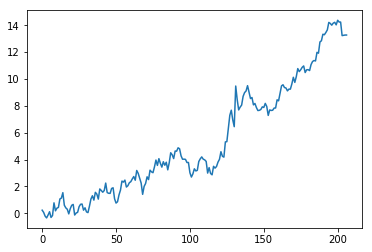

In [34]:
result()

In [20]:
# 学習データを使用して、線形回帰モデルを作成します
from sklearn.linear_model import LogisticRegression # scikit-learnライブラリの関数を使用します
logistic_regression_model = linear_model.LogisticRegression()

logistic_regression_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
Y_pred = logistic_regression_model.predict(X_test) # 予測する

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(logistic_regression_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(logistic_regression_model.score(X_test, Y_test)))

予測日数：207、正解日数：111、正解率：53.62318840579711
Training score: 0.574
Test score: 0.531


Benefit is 8.626 yen
Benefit2 is 8.487 yen


,0,1,2,3,4
0,110.466,1.0,0.231,0.231,110.697000
1,110.697,-1.0,-0.165,0.066,110.532000
2,110.862,1.0,-0.277,-0.211,110.255825
3,110.585,1.0,-0.134,-0.345,110.122223
4,110.451,1.0,0.216,-0.129,110.337580
5,110.667,1.0,-0.244,-0.373,110.094307
6,110.423,1.0,0.425,0.052,110.518042
7,110.848,1.0,0.143,0.195,110.660616
8,110.991,1.0,0.944,1.139,111.601806
9,111.935,1.0,0.592,1.731,112.192044


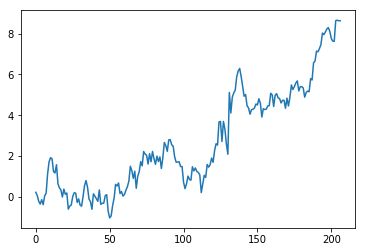

In [22]:
result()

Benefit is -0.464 yen
Benefit2 is -0.487 yen


,0,1,2,3,4
0,110.466,1.0,0.000,0.000,110.466000
1,110.697,-1.0,0.000,0.000,110.466000
2,110.862,1.0,0.000,0.000,110.466000
3,110.585,1.0,0.000,0.000,110.466000
4,110.451,1.0,0.000,0.000,110.466000
5,110.667,1.0,0.000,0.000,110.466000
6,110.423,1.0,0.000,0.000,110.466000
7,110.848,1.0,0.000,0.000,110.466000
8,110.991,1.0,0.000,0.000,110.466000
9,111.935,1.0,0.000,0.000,110.466000


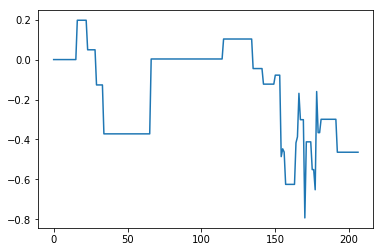

In [23]:
result_proba(logistic_regression_model)

In [24]:
from sklearn.tree import DecisionTreeClassifier # scikit-learnライブラリの関数を使用します
tree_model = DecisionTreeClassifier(max_depth = 14)

tree_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
Y_pred = tree_model.predict(X_test) # 予測する

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(tree_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(tree_model.score(X_test, Y_test)))

予測日数：207、正解日数：108、正解率：52.17391304347826
Training score: 0.708
Test score: 0.517


Benefit is 5.640 yen
Benefit2 is 5.273 yen


,0,1,2,3,4
0,110.466,1.0,0.231,0.231,110.697000
1,110.697,1.0,0.165,0.396,110.862000
2,110.862,1.0,-0.277,0.119,110.585000
3,110.585,-1.0,0.134,0.253,110.719000
4,110.451,-1.0,-0.216,0.037,110.502476
5,110.667,-1.0,0.244,0.281,110.746113
6,110.423,1.0,0.425,0.706,111.172357
7,110.848,1.0,0.143,0.849,111.315775
8,110.991,1.0,0.944,1.793,112.262537
9,111.935,1.0,0.592,2.385,112.856270


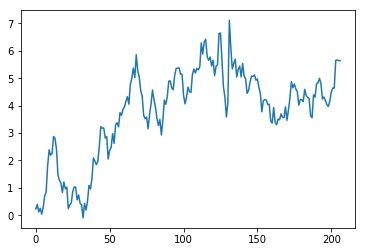

In [26]:
result()

Benefit is -0.965 yen
Benefit2 is -0.973 yen


,0,1,2,3,4
0,110.466,1.0,0.000,0.000,110.466000
1,110.697,1.0,0.000,0.000,110.466000
2,110.862,1.0,0.277,0.277,110.742011
3,110.585,-1.0,0.000,0.277,110.742011
4,110.451,-1.0,0.000,0.277,110.742011
5,110.667,-1.0,0.000,0.277,110.742011
6,110.423,1.0,0.000,0.277,110.742011
7,110.848,1.0,0.000,0.277,110.742011
8,110.991,1.0,0.000,0.277,110.742011
9,111.935,1.0,0.000,0.277,110.742011


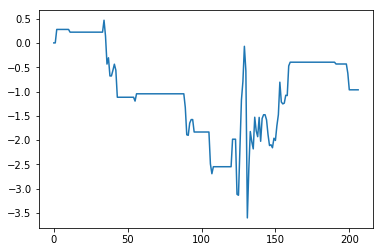

In [27]:
result_proba(tree_model)

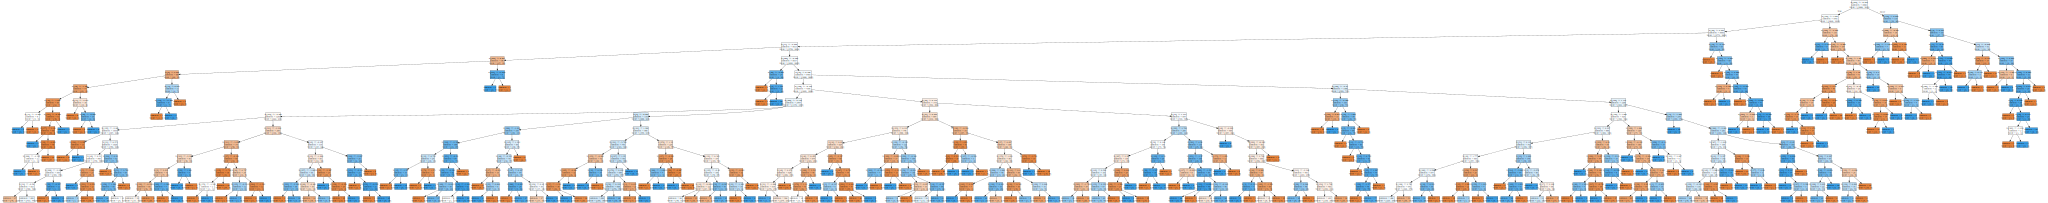

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file="tree_model.dot", impurity = False, filled=True)

import graphviz
with open("tree_model.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Text(0,0.5,'Feature')

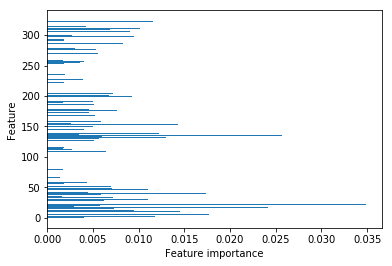

In [29]:
n_features = X.shape[1]
plt.barh(range(n_features), tree_model.feature_importances_, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [30]:
from sklearn.ensemble import RandomForestClassifier # scikit-learnライブラリの関数を使用します
forest_model = RandomForestClassifier(n_estimators=5, max_depth=5)

forest_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
Y_pred = forest_model.predict(X_test) # 予測する


# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(forest_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(forest_model.score(X_test, Y_test)))

予測日数：207、正解日数：97、正解率：46.85990338164252
Training score: 0.571
Test score: 0.464


Benefit is -2.198 yen
Benefit2 is -2.544 yen


,0,1,2,3,4
0,110.466,1.0,0.231,0.231,110.697000
1,110.697,1.0,0.165,0.396,110.862000
2,110.862,1.0,-0.277,0.119,110.585000
3,110.585,1.0,-0.134,-0.015,110.451000
4,110.451,1.0,0.216,0.201,110.667000
5,110.667,1.0,-0.244,-0.043,110.423000
6,110.423,-1.0,-0.425,-0.468,109.998000
7,110.848,1.0,0.143,-0.325,110.139903
8,110.991,1.0,0.944,0.619,111.076665
9,111.935,1.0,0.592,1.211,111.664125


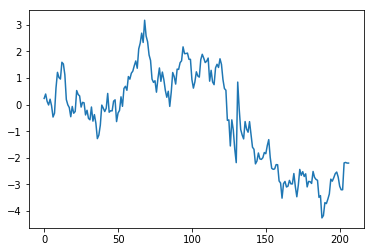

In [32]:
result()

Text(0,0.5,'Feature')

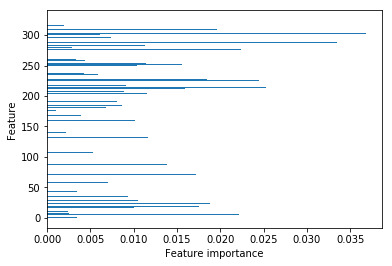

In [33]:
n_features = X.shape[1]
plt.barh(range(n_features), forest_model.feature_importances_, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Benefit is 0.663 yen
Benefit2 is 0.625 yen


,0,1,2,3,4
0,110.466,1.0,0.000,0.000,110.466000
1,110.697,1.0,0.000,0.000,110.466000
2,110.862,1.0,0.000,0.000,110.466000
3,110.585,1.0,0.000,0.000,110.466000
4,110.451,1.0,0.000,0.000,110.466000
5,110.667,1.0,0.000,0.000,110.466000
6,110.423,-1.0,0.000,0.000,110.466000
7,110.848,1.0,0.000,0.000,110.466000
8,110.991,1.0,0.000,0.000,110.466000
9,111.935,1.0,0.000,0.000,110.466000


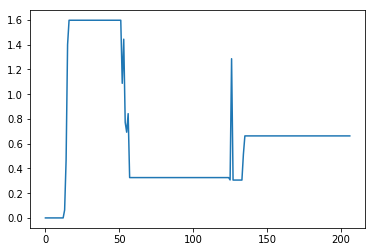

In [34]:
result_proba(forest_model)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt_model = GradientBoostingClassifier()
gbrt_model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
Y_pred = gbrt_model.predict(X_test) # 予測する

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(gbrt_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(gbrt_model.score(X_test, Y_test)))

予測日数：207、正解日数：110、正解率：53.14009661835749
Training score: 0.754
Test score: 0.527


Benefit is 3.344 yen
Benefit2 is 3.026 yen


,0,1,2,3,4
0,110.466,1.0,0.231,0.231,110.697000
1,110.697,1.0,0.165,0.396,110.862000
2,110.862,1.0,-0.277,0.119,110.585000
3,110.585,1.0,-0.134,-0.015,110.451000
4,110.451,-1.0,-0.216,-0.231,110.235000
5,110.667,-1.0,0.244,0.013,110.478048
6,110.423,-1.0,-0.425,-0.412,110.052836
7,110.848,-1.0,-0.143,-0.555,109.910861
8,110.991,1.0,0.944,0.389,110.845675
9,111.935,1.0,0.592,0.981,111.431913


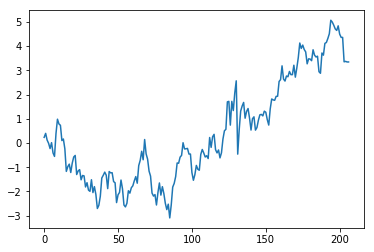

In [37]:
result()

Text(0,0.5,'Feature')

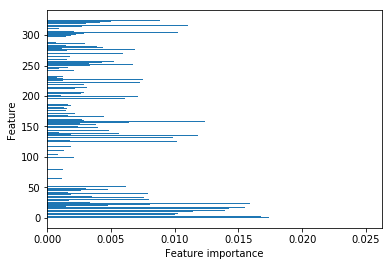

In [38]:
n_features = X.shape[1]
plt.barh(range(n_features), gbrt_model.feature_importances_, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Benefit is 1.115 yen
Benefit2 is 1.022 yen


,0,1,2,3,4
0,110.466,1.0,0.000,0.000,110.466000
1,110.697,1.0,0.000,0.000,110.466000
2,110.862,1.0,0.000,0.000,110.466000
3,110.585,1.0,0.000,0.000,110.466000
4,110.451,-1.0,0.000,0.000,110.466000
5,110.667,-1.0,0.000,0.000,110.466000
6,110.423,-1.0,0.000,0.000,110.466000
7,110.848,-1.0,0.143,0.143,110.608507
8,110.991,1.0,0.000,0.143,110.608507
9,111.935,1.0,0.000,0.143,110.608507


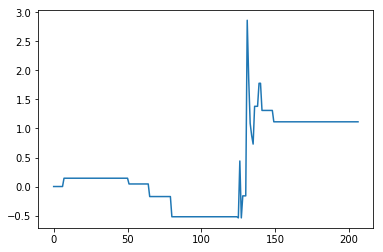

In [39]:
result_proba(gbrt_model)